In [1]:
import numpy as np
import sympy as sp
import pandas as pd
# import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sp.init_printing(use_latex="mathjax")
%matplotlib widget

In [2]:
x, y, z= sp.symbols("x y z")

# 1


In [3]:
z = x * y + y**2
z_func = sp.lambdify((x, y), z, "numpy")

start_point = np.array([5.0, 5.0])

x_grid, y_grid = np.meshgrid(np.linspace(-6, 6, 1000), np.linspace(-6, 6, 1000))
z_grid = z_func(x_grid, y_grid)

## Solve


In [4]:
grad = [sp.diff(z, var) for var in (x, y)]
grad_func = sp.lambdify((x, y), grad, "numpy")

display(grad)

[y, x + 2⋅y]

In [5]:
lr = 1e-3
eps = 1e-6
epoch = 1000

In [6]:
path = [np.append(start_point, z_func(*start_point))]

for i in range(epoch):
    prev = path[-1]
    prev_xy = prev[:2]
    grad_val = np.array(grad_func(*prev_xy), dtype=float)
    path.append(prev_xy - lr * grad_val)
    cur_xy = path[-1]
    path[-1] = np.append(cur_xy, z_func(*cur_xy))
    if abs(path[-1][-1] - prev[-1]) < eps:
        break

path = np.array(path)

display(path[-1])

array([ 4.00556863, -1.02858446, -3.06207965])

## Plot


In [7]:
# fig = go.Figure()
# fig.add_trace(
#     go.Surface(
#         x=x_grid,
#         y=y_grid,
#         z=z_grid,
#         colorscale="viridis",
#         opacity=0.85,
#         colorbar=dict(len=0.75),
#     )
# )
# fig.add_trace(
#     go.Scatter3d(
#         x=path[:, 0],
#         y=path[:, 1],
#         z=path[:, 2],
#         mode="lines+markers",
#         line=dict(width=1, color="red"),
#         marker=dict(size=2, color="red"),
#         name="GD Path",
#         showlegend=True,
#     )
# )

# fig.update_layout(
#     title="GD plot",
#     scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
#     width=800,
#     height=600,
# )
# fig.show()

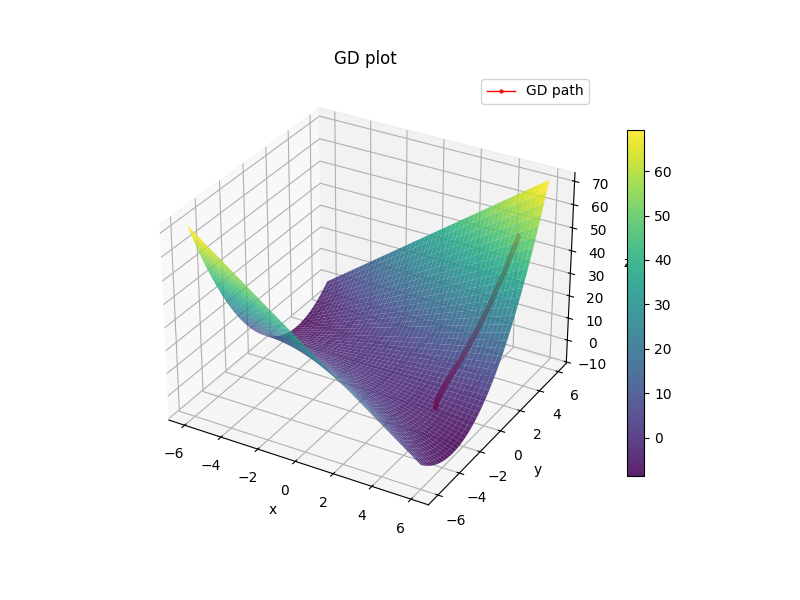

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap="viridis", alpha=0.875)
ax.plot(
    path[:, 0],
    path[:, 1],
    path[:, 2],
    color="red",
    marker="o",
    markersize=2,
    linewidth=1,
    label="GD path",
)

fig.colorbar(surf, shrink=0.75)
ax.set_title("GD plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()

## Animate


In [9]:
# fig = go.Figure()
# fig.add_trace(
#     go.Surface(
#         x=x_grid[::10],
#         y=y_grid[::10],
#         z=z_grid[::10],
#         colorscale="viridis",
#         opacity=0.85,
#         name="f",
#         colorbar=dict(len=0.75),
#     )
# )
# fig.add_trace(
#     go.Scatter3d(
#         x=[path[0, 0]],
#         y=[path[0, 1]],
#         z=[path[0, 2]],
#         mode="lines+markers",
#         marker=dict(size=2, color="red"),
#         line=dict(width=1, color="blue"),
#         name="GD path",
#         showlegend=True,
#     )
# )

# frames = []
# for i in range(10, len(path), 10):
#     cur_path = path[: i + 1 : 10]
#     frame = go.Frame(
#         data=[go.Scatter3d(x=cur_path[:, 0], y=cur_path[:, 1], z=cur_path[:, 2])],
#         traces=[1],
#         name=str(i),
#     )
#     frames.append(frame)
# fig.frames = frames

# fig.update_layout(
#     title="GD animation",
#     scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
#     width=800,
#     height=600,
#     updatemenus=[
#         {
#             "type": "buttons",
#             "showactive": True,
#             "y": -0.15,
#             "x": 1.15,
#             "xanchor": "right",
#             "yanchor": "bottom",
#             "buttons": [
#                 {
#                     "label": "Play",
#                     "method": "animate",
#                     "args": [
#                         None,
#                         {
#                             "frame": {"duration": 250, "redraw": True},
#                             "fromcurrent": True,
#                             "transition": {"duration": 0},
#                         },
#                     ],
#                 },
#                 {
#                     "label": "Pause",
#                     "method": "animate",
#                     "args": [
#                         [None],
#                         {
#                             "frame": {"duration": 0, "redraw": False},
#                             "mode": "immediate",
#                             "transition": {"duration": 0},
#                         },
#                     ],
#                 },
#             ],
#         }
#     ],
#     sliders=[
#         {
#             "active": 0,
#             "y": 0,
#             "len": 0.9,
#             "x": 0.05,
#             "steps": [
#                 {
#                     "label": str(k),
#                     "method": "animate",
#                     "args": [
#                         [str(k)],
#                         {
#                             "frame": {"duration": 0, "redraw": True},
#                             "mode": "immediate",
#                         },
#                     ],
#                 }
#                 for k in range(len(path))
#             ],
#         }
#     ],
# )
# fig.show()

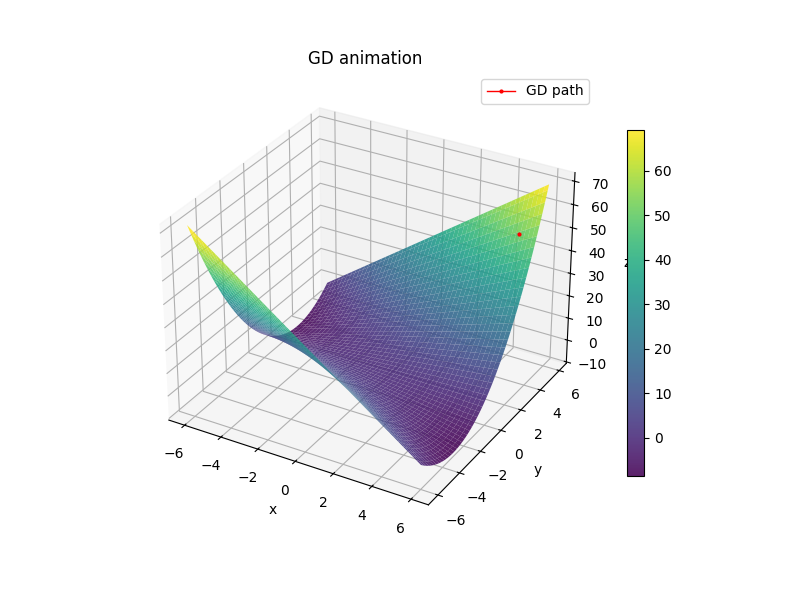

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    x_grid[::10], y_grid[::10], z_grid[::10], cmap="viridis", alpha=0.875
)
(line,) = ax.plot(
    [path[0][0]],
    [path[0][1]],
    [path[0][2]],
    color="red",
    marker="o",
    markersize=2,
    linewidth=1,
    label="GD path",
    zorder=10,
)
ani = animation.FuncAnimation(
    fig,
    lambda frame: (
        line.set_data(
            path[: (11 * frame + 1) : 10, 0],
            path[: (11 * frame + 1) : 10, 1],
        ),
        line.set_3d_properties(path[: (11 * frame + 1) : 10, 2]),
        line,
    )[-1:],
    frames=len(path) // 10,
    interval=250,
    blit=True,
    repeat=False,
)

fig.colorbar(surf, shrink=0.75)
ax.set_title("GD animation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()

# 2


In [11]:
w1, w2, b, x1, x2 = sp.symbols("w1 w2 b x1 x2")

W = sp.Matrix([w1, w2])
x = sp.Matrix([x1, x2])
f = 1 / (1 + sp.exp(-y))

z = W.dot(x) + b
E = (1 / 2) * (f.subs(y, z) - y) ** 2
E_func = sp.lambdify((w1, w2, b, x1, x2, y), E, "numpy")

display(E)

                                  2
    ⎛                1           ⎞ 
0.5⋅⎜-y + ───────────────────────⎟ 
    ⎜      -b - w₁⋅x₁ - w₂⋅x₂    ⎟ 
    ⎝     ℯ                   + 1⎠ 

## Calculate gradient


In [12]:
grad = sp.Matrix([E.diff(w1), E.diff(w2), E.diff(b)])
grad_func = sp.lambdify((w1, w2, b, x1, x2, y), grad, "numpy")

display(grad)

⎡       ⎛                1           ⎞  -b - w₁⋅x₁ - w₂⋅x₂⎤
⎢1.0⋅x₁⋅⎜-y + ───────────────────────⎟⋅ℯ                  ⎥
⎢       ⎜      -b - w₁⋅x₁ - w₂⋅x₂    ⎟                    ⎥
⎢       ⎝     ℯ                   + 1⎠                    ⎥
⎢─────────────────────────────────────────────────────────⎥
⎢                                        2                ⎥
⎢               ⎛ -b - w₁⋅x₁ - w₂⋅x₂    ⎞                 ⎥
⎢               ⎝ℯ                   + 1⎠                 ⎥
⎢                                                         ⎥
⎢       ⎛                1           ⎞  -b - w₁⋅x₁ - w₂⋅x₂⎥
⎢1.0⋅x₂⋅⎜-y + ───────────────────────⎟⋅ℯ                  ⎥
⎢       ⎜      -b - w₁⋅x₁ - w₂⋅x₂    ⎟                    ⎥
⎢       ⎝     ℯ                   + 1⎠                    ⎥
⎢─────────────────────────────────────────────────────────⎥
⎢                                        2                ⎥
⎢               ⎛ -b - w₁⋅x₁ - w₂⋅x₂    ⎞                 ⎥
⎢               ⎝ℯ                   + 1

## Load data


In [13]:
df = pd.read_csv("Assets/Data/train_exam.txt", sep="\s+", header=None)
df.columns = ["x1", "x2", "y"]

display(df)

,x1,x2,y
0,4.0,0.82,1
1,3.0,0.80,0
2,2.5,0.75,0
3,3.4,0.90,1
4,4.2,0.88,1
5,5.0,0.92,1
6,2.7,0.99,0
7,3.3,0.85,0
8,4.2,0.72,0
9,3.6,0.80,0


In [14]:
X = np.array(df[["x1", "x2"]])
y0 = np.array(df[["y"]])

display(X, y0)

array([[4.  , 0.82],
       [3.  , 0.8 ],
       [2.5 , 0.75],
       [3.4 , 0.9 ],
       [4.2 , 0.88],
       [5.  , 0.92],
       [2.7 , 0.99],
       [3.3 , 0.85],
       [4.2 , 0.72],
       [3.6 , 0.8 ],
       [2.9 , 0.85],
       [3.9 , 0.85],
       [4.5 , 0.99],
       [4.7 , 0.9 ],
       [4.6 , 0.8 ],
       [4.6 , 0.75],
       [3.4 , 0.64],
       [2.5 , 0.9 ]])

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

## Train


In [15]:
n, d = X.shape
losses = []

In [16]:
np.random.seed(42)
W_val = np.random.randn(d)
b_val = np.random.randn()

lr = 1e-1
eps = 1e-3
epoch = 2500

In [17]:
for i in range(epoch):
    losses.append(
        np.mean(E_func(W_val[0], W_val[1], b_val, X[:, 0], X[:, 1], y0.flatten()))
    )
    if abs(losses[-1]) < eps:
        break
    grad_val = np.mean(
        np.array(grad_func(W_val[0], W_val[1], b_val, X[:, 0], X[:, 1], y0.flatten())),
        axis=-1,
    )
    W_val -= lr * grad_val[:d].squeeze()
    b_val -= lr * grad_val[d:].squeeze()

display(W_val, b_val, losses[-1])

array([ 0.84595278, -1.25153197])

np.float64(-2.166734912422767)

np.float64(0.09204701202662575)

## Plot


In [18]:
# fig = go.Figure()
# fig.add_trace(
#     go.Scatter(x=list(range(len(losses))), y=losses, mode="lines", name="Loss")
# )

# fig.update_layout(
#     title="Loss over epochs",
#     xaxis_title="epoch",
#     yaxis_title="MSE loss",
#     width=800,
#     height=600,
# )
# fig.show()

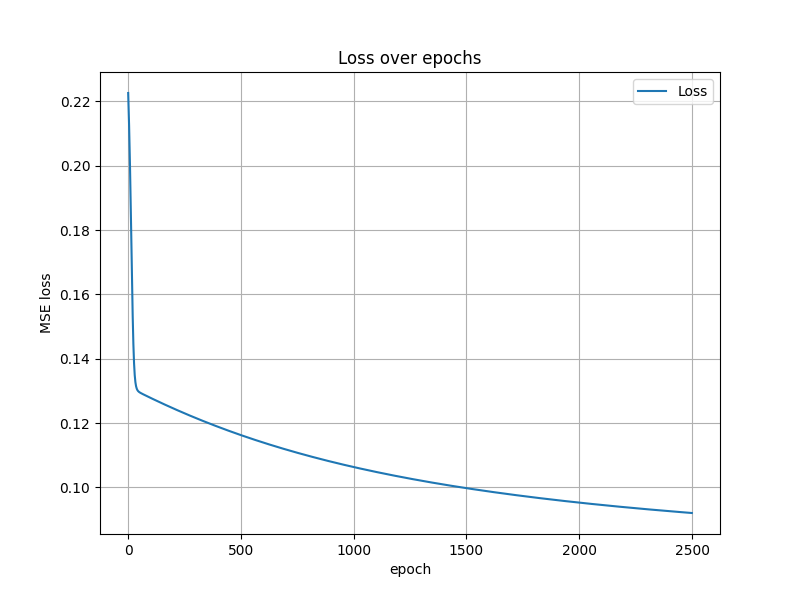

In [19]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(len(losses)), losses, label="Loss", linestyle="-")

plt.title("Loss over epochs")
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.grid(True)
plt.legend()
plt.show()

## Two-layer Network


In [20]:
w1_0_1, w2_0_1, b_0_1, w1_0_2, w2_0_2, b_0_2 = sp.symbols(
    "w1_0_1 w2_0_1 b_0_1 w1_0_2 w2_0_2 b_0_2"
)

W_0_1 = sp.Matrix([w1_0_1, w2_0_1])
W_0_2 = sp.Matrix([w1_0_2, w2_0_2])

z1_2 = W_0_1.dot(x) + b_0_1
z2_2 = W_0_2.dot(x) + b_0_2

z2 = sp.Matrix([f.subs(y, z1_2), f.subs(y, z2_2)])

z = W.dot(z2) + b

E = (1 / 2) * (f.subs(y, z) - y) ** 2
E_func = sp.lambdify(
    (w1_0_1, w2_0_1, b_0_1, w1_0_2, w2_0_2, b_0_2, w1, w2, b, x1, x2, y), E, "numpy"
)

display(E)

                                                                               ↪
    ⎛                                             1                            ↪
0.5⋅⎜-y + ──────────────────────────────────────────────────────────────────── ↪
    ⎜                           w₁                                   w₂        ↪
    ⎜      -b - ────────────────────────────────── - ───────────────────────── ↪
    ⎜            -b₀ ₁ - w₁ ₀ ₁⋅x₁ - w₂ ₀ ₁⋅x₂        -b₀ ₂ - w₁ ₀ ₂⋅x₁ - w₂ ₀ ↪
    ⎜           ℯ                              + 1   ℯ                         ↪
    ⎝     ℯ                                                                    ↪

↪               2
↪              ⎞ 
↪ ─────────────⎟ 
↪              ⎟ 
↪ ─────────    ⎟ 
↪  ₂⋅x₂        ⎟ 
↪       + 1    ⎟ 
↪           + 1⎠ 

### Calculate gradient


In [21]:
grad = sp.Matrix(
    sp.derive_by_array(E, [w1_0_1, w2_0_1, b_0_1, w1_0_2, w2_0_2, b_0_2, w1, w2, b])
)
grad_func = sp.lambdify(
    (w1_0_1, w2_0_1, b_0_1, w1_0_2, w2_0_2, b_0_2, w1, w2, b, x1, x2, y), grad, "numpy"
)

display(grad)

⎡                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢          ⎛                                             1                     ↪
⎢1.0⋅w₁⋅x₁⋅⎜-y + ───────────────────────────────────────────────────────────── ↪
⎢          ⎜                           w₁                                   w₂ ↪
⎢          ⎜      -b - ────────────────────────────────── - ────────────────── ↪
⎢          ⎜            -b₀ ₁ - w₁ ₀ ₁⋅x₁ - w₂ ₀ ₁⋅x₂        -b₀ ₂ - w₁ ₀ ₂⋅x₁ ↪
⎢          ⎜           ℯ                              + 1   ℯ                  ↪
⎢          ⎝     ℯ                                                             ↪
⎢───────────────────────────────────────────────────────────────────────────── ↪
⎢                                                                              ↪
⎢                           

### Train


In [22]:
d1 = 2
losses = []

In [23]:
np.random.seed(42)
W_0_1_val = np.random.randn(d)
W_0_2_val = np.random.randn(d)
W_val = np.random.randn(d1)
b_0_1_val = np.random.randn()
b_0_2_val = np.random.randn()
b_val = np.random.randn()

lr = 1e-1
eps = 1e-3
epoch = 5000

In [24]:
for i in range(epoch):
    losses.append(
        np.mean(
            E_func(
                W_0_1_val[0],
                W_0_1_val[1],
                b_0_1_val,
                W_0_2_val[0],
                W_0_2_val[1],
                b_0_2_val,
                W_val[0],
                W_val[1],
                b_val,
                X[:, 0],
                X[:, 1],
                y0.flatten(),
            )
        )
    )
    if abs(losses[-1]) < eps:
        break
    grad_val = np.mean(
        np.array(
            grad_func(
                W_0_1_val[0],
                W_0_1_val[1],
                b_0_1_val,
                W_0_2_val[0],
                W_0_2_val[1],
                b_0_2_val,
                W_val[0],
                W_val[1],
                b_val,
                X[:, 0],
                X[:, 1],
                y0.flatten(),
            )
        ),
        axis=-1,
    )
    W_0_1_val -= lr * grad_val[:d].squeeze()
    b_0_1_val -= lr * grad_val[d].squeeze()
    W_0_2_val -= lr * grad_val[d + 1 : 2 * d + 1].squeeze()
    b_0_2_val -= lr * grad_val[2 * d + 1].squeeze()
    W_val -= lr * grad_val[2 * d + 2 : 2 * d + 2 + d1].squeeze()
    b_val -= lr * grad_val[2 * d + 2 + d1].squeeze()

display(W_0_1_val, b_0_1_val, W_0_2_val, b_0_2_val, W_val, b_val, losses[-1])

array([ 0.40881966, -0.19566006])

np.float64(1.497392791914109)

array([0.64190273, 1.52113299])

np.float64(0.7649501427697942)

array([0.30909587, 0.00799123])

np.float64(-0.5117292150674687)

np.float64(0.12304931032272909)

### Plot


In [25]:
# fig = go.Figure()
# fig.add_trace(
#     go.Scatter(x=list(range(len(losses))), y=losses, mode="lines", name="Loss")
# )

# fig.update_layout(
#     title="Loss over epochs",
#     xaxis_title="epoch",
#     yaxis_title="MSE loss",
#     width=800,
#     height=600,
# )
# fig.show()

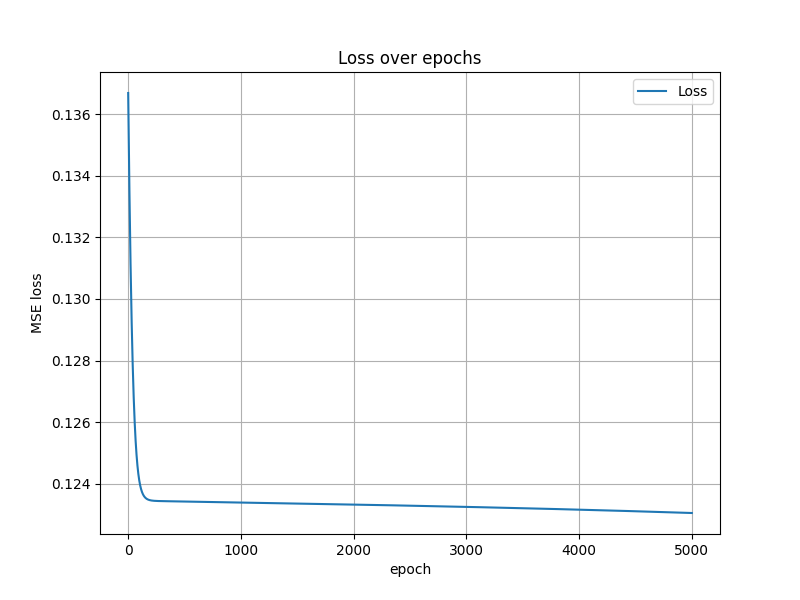

In [26]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(len(losses)), losses, label="Loss", linestyle="-")

plt.title("Loss over epochs")
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.grid(True)
plt.legend()
plt.show()

# 3


In [27]:
x, y = sp.symbols("x y")

z = x**3 + y**3
z_func = sp.lambdify((x, y), z, "numpy")

start_point = np.array([5.0, 5.0])

x_grid, y_grid = np.meshgrid(np.linspace(-6, 6, 1000), np.linspace(-6, 6, 1000))
z_grid = z_func(x_grid, y_grid)

## Solve


In [28]:
grad = [sp.diff(z, var) for var in (x, y)]
grad_func = sp.lambdify((x, y), grad, "numpy")

display(grad)

⎡   2     2⎤
⎣3⋅x , 3⋅y ⎦

In [29]:
lr = 1e-3
eps = 1e-6
epoch = 1000

In [30]:
path = [np.append(start_point, z_func(*start_point))]

for i in range(epoch):
    prev = path[-1]
    prev_xy = prev[:2]
    grad_val = np.array(grad_func(*prev_xy), dtype=float)
    path.append(prev_xy - lr * grad_val)
    cur_xy = path[-1]
    path[-1] = np.append(cur_xy, z_func(*cur_xy))
    if abs(path[-1][-1] - prev[-1]) < eps:
        break

path = np.array(path)

display(path[-1])

array([0.31168699, 0.31168699, 0.06056002])

## Plot


In [31]:
# fig = go.Figure()
# fig.add_trace(
#     go.Surface(
#         x=x_grid,
#         y=y_grid,
#         z=z_grid,
#         colorscale="viridis",
#         opacity=0.85,
#         colorbar=dict(len=0.75),
#     )
# )
# fig.add_trace(
#     go.Scatter3d(
#         x=path[:, 0],
#         y=path[:, 1],
#         z=path[:, 2],
#         mode="lines+markers",
#         line=dict(width=1, color="red"),
#         marker=dict(size=2, color="red"),
#         name="GD Path",
#         showlegend=True,
#     )
# )

# fig.update_layout(
#     title="GD plot",
#     scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
#     width=800,
#     height=600,
# )
# fig.show()

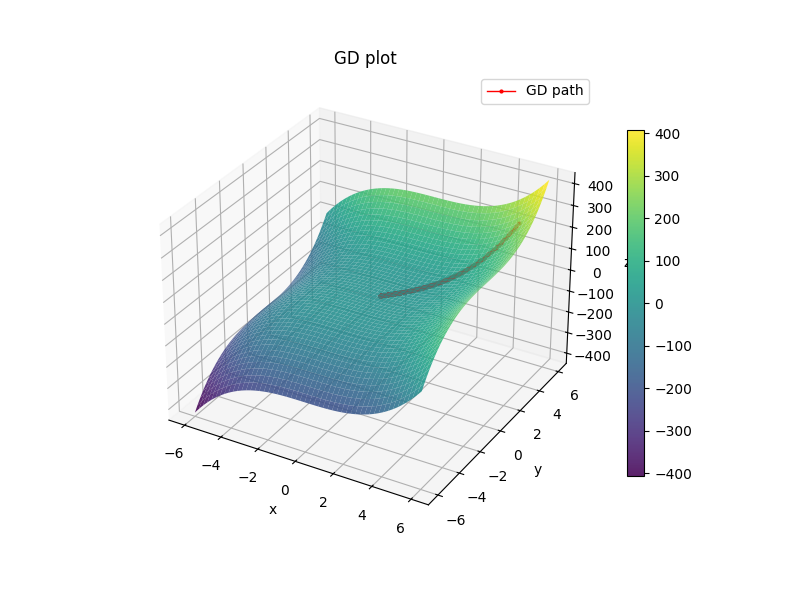

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap="viridis", alpha=0.875)
ax.plot(
    path[:, 0],
    path[:, 1],
    path[:, 2],
    color="red",
    marker="o",
    markersize=2,
    linewidth=1,
    label="GD path",
)

fig.colorbar(surf, shrink=0.75)
ax.set_title("GD plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()

## Animate


In [33]:
# fig = go.Figure()
# fig.add_trace(
#     go.Surface(
#         x=x_grid[::10],
#         y=y_grid[::10],
#         z=z_grid[::10],
#         colorscale="viridis",
#         opacity=0.85,
#         name="f",
#         colorbar=dict(len=0.75),
#     )
# )
# fig.add_trace(
#     go.Scatter3d(
#         x=[path[0, 0]],
#         y=[path[0, 1]],
#         z=[path[0, 2]],
#         mode="lines+markers",
#         marker=dict(size=2, color="red"),
#         line=dict(width=1, color="blue"),
#         name="GD path",
#         showlegend=True,
#     )
# )

# frames = []
# for i in range(10, len(path), 10):
#     cur_path = path[: i + 1 : 10]
#     frame = go.Frame(
#         data=[go.Scatter3d(x=cur_path[:, 0], y=cur_path[:, 1], z=cur_path[:, 2])],
#         traces=[1],
#         name=str(i),
#     )
#     frames.append(frame)
# fig.frames = frames

# fig.update_layout(
#     title="GD animation",
#     scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
#     width=800,
#     height=600,
#     updatemenus=[
#         {
#             "type": "buttons",
#             "showactive": True,
#             "y": -0.15,
#             "x": 1.15,
#             "xanchor": "right",
#             "yanchor": "bottom",
#             "buttons": [
#                 {
#                     "label": "Play",
#                     "method": "animate",
#                     "args": [
#                         None,
#                         {
#                             "frame": {"duration": 250, "redraw": True},
#                             "fromcurrent": True,
#                             "transition": {"duration": 0},
#                         },
#                     ],
#                 },
#                 {
#                     "label": "Pause",
#                     "method": "animate",
#                     "args": [
#                         [None],
#                         {
#                             "frame": {"duration": 0, "redraw": False},
#                             "mode": "immediate",
#                             "transition": {"duration": 0},
#                         },
#                     ],
#                 },
#             ],
#         }
#     ],
#     sliders=[
#         {
#             "active": 0,
#             "y": 0,
#             "len": 0.9,
#             "x": 0.05,
#             "steps": [
#                 {
#                     "label": str(k),
#                     "method": "animate",
#                     "args": [
#                         [str(k)],
#                         {
#                             "frame": {"duration": 0, "redraw": True},
#                             "mode": "immediate",
#                         },
#                     ],
#                 }
#                 for k in range(len(path))
#             ],
#         }
#     ],
# )
# fig.show()

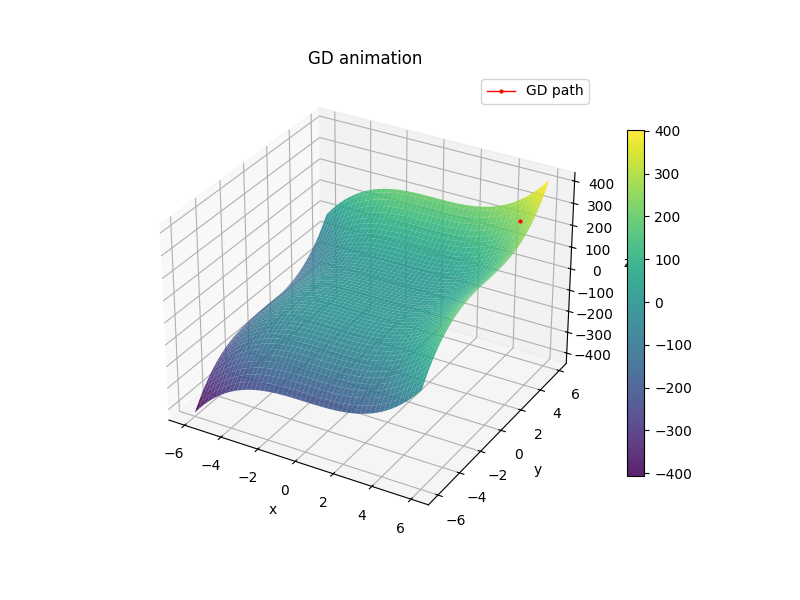

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    x_grid[::10], y_grid[::10], z_grid[::10], cmap="viridis", alpha=0.875
)
(line,) = ax.plot(
    [path[0][0]],
    [path[0][1]],
    [path[0][2]],
    color="red",
    marker="o",
    markersize=2,
    linewidth=1,
    label="GD path",
    zorder=10,
)
ani = animation.FuncAnimation(
    fig,
    lambda frame: (
        line.set_data(
            path[: (11 * frame + 1) : 10, 0],
            path[: (11 * frame + 1) : 10, 1],
        ),
        line.set_3d_properties(path[: (11 * frame + 1) : 10, 2]),
        line,
    )[-1:],
    frames=len(path) // 10,
    interval=250,
    blit=True,
    repeat=False,
)

fig.colorbar(surf, shrink=0.75)
ax.set_title("GD animation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()